<a href="https://colab.research.google.com/github/juanicolombo97/TP-Python-G2/blob/main/Trabajo_Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Integrador Grupo 2

### Imports

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import time

### Codigo

#### Clase Archivo

In [2]:
class Archivo:

    # Clase que se encarga de manejar un archivo.
  def __init__(self, link_archivo, separador):
    self.link_archivo = link_archivo
    self.separador = separador
    self.archivo = None
    self.archivo_leido = False
    

  def leer_archivo(self):
    # Funcion que lee un archivo csv y lo almacena en la variable self.archivo como un dataframe.

    try:
      self.archivo = pd.read_csv(self.link_archivo, sep=self.separador)
    except FileNotFoundError:
      return 'El archivo no se encontro.' 
    else:
      self.archivo_leido = True
      return "El archivo se abrio correctamente."

  def obtener_dataframe(self):
    # Devuelve el dataframe y si no lanza un error que no se leyo el archivo.
    if self.archivo_leido:
      return self.archivo
    return 'No se encuentra un archivo leido.'



#### Clase ManejoDataFrames

In [3]:
class ManejoDataFrame:
  
  # Clase que recive en el constructor una lista de archivos y los une.
  def __init__(self):
    pass

  def concatenar_dataframes(self, lista_archivos):
    return pd.concat(lista_archivos)

  def filtrar_dataframe(self, dataframe,  lista_columnas):
    return dataframe[lista_columnas]

  def filtrado_formato_largo(self, dataframe, lista_vars, nombre_variable, valor_nombre):
    return dataframe.melt(id_vars=lista_vars, var_name=nombre_variable, value_name=valor_nombre)

  def convercion_datetime(self, dataframe):
    dataframe['DIA'] = dataframe['DIA'].str.strip('D')
    dataframe['FECHA'] = dataframe['DIA'].astype(str) + '/' + dataframe['MES'].astype(str) + '/' + dataframe['ANO'].astype(str)
    dataframe['FECHA'] = pd.to_datetime(dataframe['FECHA'], format="%d/%m/%Y", errors='coerce')
    return dataframe

  def eliminar_datos_invalidos(self, dataframe, columna):
    return dataframe.drop(dataframe[np.isnat(dataframe[columna])].index, inplace=False)

  def ordenar_dataframe(self, dataframe,  lista_columnas):
    return dataframe.sort_values(lista_columnas)

  def obtener_valores_columna(self, dataframe, columna):
    return dataframe[columna].unique()

  def obtener_descripcion(self, dataframe, columna):
    return dataframe.groupby(columna).CONTAMINANTE.describe()

  def obtener_info_pedida(self, dataframe, magnitud, estacion):
    return dataframe[(dataframe['ESTACION'] == estacion) & (dataframe['MAGNITUD'] == magnitud)].CONTAMINANTE.describe()

  def mediciones_segun_estacion(self, dataframe, estacion, magnitud):
    lista_mediciones_estacion = []
    df_modificado = dataframe[(dataframe['ESTACION'] == estacion) & (dataframe['MAGNITUD'] == magnitud)]
    for medicion in df_modificado['CONTAMINANTE']:
      lista_mediciones_estacion.append(medicion)
    return lista_mediciones_estacion

  def plotear(self, dataframe, fecha_inicial, fecha_limite, estacion):
    dataframe = dataframe[(dataframe['FECHA'] <= fecha_limite) & (dataframe['FECHA'] >= fecha_inicial) & (dataframe['ESTACION'] == estacion)] 
    df = dataframe[['MAGNITUD', 'CONTAMINANTE', 'FECHA']]
    df = df.pivot(index = 'FECHA', columns = 'MAGNITUD', values = 'CONTAMINANTE')
    fig, ax = plt.subplots()
    df.plot(ax = ax)
    plt.title('Evolucion diaria de las magnitudes segun estacion ' + str(estacion), fontsize=18, color='w')
    ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1.0), shadow=True, ncol=1)
    plt.ylabel('Mediciones contaminantes', fontsize=10, color='w')
    ax.tick_params(colors='white', which='both')
    plt.xlabel('Fecha', color='w')
    return plt
  
  def contaminantes_segun_region(self,dataframe,  mes, magnitud):
    dataframe = dataframe[(dataframe['MES'] == mes) & (dataframe['MAGNITUD'] == magnitud)]
    dataframe = dataframe[['ESTACION','CONTAMINANTE']]
    lista_dentro = [23, 4, 1, 49, 18, 2, 8, 15, 44]
    dataframe_dentro =  dataframe.ESTACION.isin(lista_dentro)
    dataframe_dentro = dataframe[dataframe_dentro]
    dataframe_fuera = ~dataframe.ESTACION.isin(lista_dentro)
    dataframe_fuera = dataframe[dataframe_fuera]
    dicccionario_estaciones = {}
    dicccionario_estaciones["Madrid Central"] = dataframe_dentro.CONTAMINANTE.mean()
    dicccionario_estaciones["Afueras Madrid"] = dataframe_fuera.CONTAMINANTE.mean()
    return dicccionario_estaciones

#### Clase Contaminante

In [4]:
class Contaminante:
  def __init__(self, diccionario):
    self.diccionario = diccionario

  def mostrar_contaminantes(self, lista_codigo):
    print("\nLos contaminantes son: ")
    for contaminante in lista_codigo:
      if contaminante in self.diccionario:
        print(self.diccionario[contaminante])

#### Clase Estacion

In [5]:
class Estacion:
  def __init__(self, diccionario):
    self.diccionario = diccionario

  def mostrar_estaciones(self, lista_codigo):
    print("\nLas estaciones son: ")
    for estacion in lista_codigo:
      if estacion in self.diccionario:
        print(self.diccionario[estacion])

### Soluciones Ejercicios

#### Ejercicio 1
Generar un DataFrame con los datos de los cuatro ficheros.

In [6]:
def ejercicio_1():
  
  # Archivo 1
  archivo1 = Archivo("https://drive.google.com/u/0/uc?id=1Ms2r2k6DscmL7ymRZp6bXk3Z-RWsqtjz&export=download", ';')
  archivo1.leer_archivo()
  # Archivo 2
  archivo2 = Archivo("https://drive.google.com/u/0/uc?id=1R5JLin8d2BhHFKSQhX2hP2bGPRCvR8Xj&export=download", ';')
  archivo2.leer_archivo()
  # Archivo 3
  archivo3 = Archivo("https://drive.google.com/u/0/uc?id=1qoB3OcPDUkerswT02uAvLshTT7J0qTWQ&export=download", ';')
  archivo3.leer_archivo()
  # Archivo 4
  archivo4 = Archivo("https://drive.google.com/u/0/uc?id=1pAbH8EwHm9KkUzyiy56auH0DvLT_DkAO&export=download", ';')
  archivo4.leer_archivo()

  manejo_df = ManejoDataFrame()
  return manejo_df.concatenar_dataframes([archivo1.obtener_dataframe(), archivo2.obtener_dataframe(), archivo3.obtener_dataframe(), archivo4.obtener_dataframe()]), manejo_df

#### Ejercicio 2
Filtrar las columnas del DataFrame para quedarse con las columnas ESTACION, MAGNITUD, ANO, MES y las correspondientes a los dias D01, D02, etc.

In [7]:
def ejercicio_2():
  dataframe, manejo_df = ejercicio_1()
  lista_cols = ['ESTACION','MAGNITUD','ANO', 'MES']
  for col in dataframe:
    if col[0] == 'D':
      lista_cols.append(col)

  return manejo_df.filtrar_dataframe(dataframe, lista_cols), manejo_df
  

#### Ejercicio 3
Reestructurar el DataFrame para que los valores de los contaminantes de las columnas de los dias aparezcan en una unica columna.

In [8]:
def ejercicio_3():
  dataframe, manejo_df = ejercicio_2() 
  return manejo_df.filtrado_formato_largo(dataframe, ['ESTACION','MAGNITUD','ANO', 'MES'], 'DIA', 'CONTAMINANTE'), manejo_df
  

#### Ejercicio 4
Anadir una columna con la fecha apartir de la concatenacion del ano, el mes y el dia.(usar el modulo datetime).

In [9]:
def ejercicio_4():
  dataframe, manejo_df = ejercicio_3()
  return manejo_df.convercion_datetime(dataframe), manejo_df

#### Ejercicio 5
Eliminamos filas con fechas no validas(utilizar la funcion isnat del modulo numpy) y ordenar el DataFrame por estaciones, containantes y fecha.

In [10]:
def ejercicio_5():
  dataframe, manejo_df =  ejercicio_4()
  dataframe = manejo_df.eliminar_datos_invalidos(dataframe, 'FECHA')
  return manejo_df.ordenar_dataframe(dataframe, ['ESTACION', 'CONTAMINANTE', 'FECHA']), manejo_df
  

#### Ejercicio 6
Mostrar por pantalla las estaciones y los contaminantes disponibles en el DataFrame.

In [11]:
def ejercicio_6():
  dataframe, manejo_df = ejercicio_5()
  lista_contaminantes = manejo_df.obtener_valores_columna(dataframe, 'MAGNITUD')
  dicc = {1: "Dióxido de azufredo",5:"Monóxido de carbono",7:"Monóxido de nitrógeno",8:"Dióxido de nitrógeno",9:"particulas <2.5um",10:"Partículas<10um",12:"Óxidos de nitrógeno",14:"Ozono",20:"Tolueno",30:"Benceno",
          35:"Etilbenceno",37:"Metaxileno",38:"paraxileno",39:"Ortoxileno",42:"Hidrocarburos Totales(hexano)",43:"Metano",44:"Hidrocarburosno metánicos(hexano)"}
  contaminantes = Contaminante(dicc)
  contaminantes.mostrar_contaminantes(lista_contaminantes)

  lista_estaciones = manejo_df.obtener_valores_columna(dataframe, 'ESTACION')
  datos2={1:"P°.recoletos",2:"Glta de Carlos V",35:"Pza del Carmen",4:"Pza de España",39:"Barrio del Pilar",6:"Pza dr Marañon",7:"Pza M. de Salamanca",8:"Escuelas Aguirre",9:"Pza Luca de Tena",38:"Cuatro caminos",
          11:"Av Ramón y Cajal",12:"Pza Manuel Becerra",40:"Vallecas",14:"Pza Fdez Ladreda",15:"Pza Castilla",16:"Arturo Soria",17:"Villaverde alto",18: "calle farolillo",19:"Huerta Castañeda",36:"Moratalaz",
          21:"Pza Cristo Rey",22:"P° Pontones",23:"Final c/alcala",24:"Casa de Campo",25:"Santa Eugenia",26:"Urb Embajada(Barajas)",27:"Barajas",47:"Mendez Alvaro",48:"P° Castellana",49:"Retiro",50:"Pza Castillana",
          54:"Ensanche Vallecas",55:"Urb Embajada(Barajas)",56:"Pza Elíptica",57:"Sanchinarro",58: "El pardo",59:"Padre Juan Carlos I",60:"Tres Olivos"}
  estaciones = Estacion(datos2)
  estaciones.mostrar_estaciones(lista_estaciones)

#### Ejercicio 7
Mostrar un resumen descriptivo (minimo, maximo, media, etc) para cada contaminante.

In [12]:
def ejercicio_7():
  dataframe, manejo_df = ejercicio_5()
  return manejo_df.obtener_descripcion(dataframe, 'MAGNITUD')
  

#### Ejercicio 8
Mostrar un resumen descriptivo por cada contaminante por distritos.

In [13]:
def ejercicio_8():
  dataframe, manejo_df = ejercicio_5()
  return manejo_df.obtener_descripcion(dataframe, ['MAGNITUD','ESTACION'])
  

#### Ejercicio 9 
Crear una funcion que reciba una estacion y un contaminante y devuelva un resumen descriptivo de las emisiones del contaminante indicando en  la estacion indicada.

In [14]:
def ejercicio_9():
  dataframe, manejo_df = ejercicio_5()
  magnitud = int(input('Ingrese el código correspondiente al contaminante: '))
  estacion = int(input('Ingrese el código correspondiente a la estación '))
  return manejo_df.obtener_info_pedida(dataframe, magnitud, estacion)

#### Ejercicio 10
Crear una funcion que reciba una estacion de medicion y una magnitud y devuelva una lista con todas las mediciones de la magnitud en la estacion.

In [15]:
def ejercicio_10():
  dataframe, manejo_df = ejercicio_5()
  magnitud = int(input('Ingrese el código correspondiente al contaminante: '))
  estacion = int(input('Ingrese el código correspondiente a la estación '))
  return manejo_df.mediciones_segun_estacion(dataframe, estacion, magnitud)

#### Ejercicio 11
Crear una funcion que reciba un rango de fechas y una estacion de medicion y genere un grafico con la evolucion diaria de las magnitudes de esa estacion en las fechas indicadas.

In [16]:
def ejercicio_11():
  dataframe, manejo_df = ejercicio_5()
  fecha_1 = pd.to_datetime(input('Ingrese la fecha de inicio en formato aaaa-mm-dd: '))
  fecha_2 = pd.to_datetime(input('Ingrese la fecha de final en formato aaaa-mm-dd: ')) 
  estacion = int(input('Ingrese el código correspondiente a la estación '))
  plot = manejo_df.plotear(dataframe, fecha_1, fecha_2, estacion)
  plot.show()

#### Ejercicio 12
Crear una funcion que reciba un mes y una magnitud y devuelva un diciconario con las medias de la magnitud dentro de Madrid Central y fuera de ella.

In [17]:
def ejercicio_12(mes, magnitud):
  dataframe, manejo_df = ejercicio_5()
  magnitud = int(input('Ingrese el código correspondiente al contaminante: '))
  mes = int(input('Ingrese el mes que desea ver: '))
  return manejo_df.contaminantes_segun_region(dataframe, mes, magnitud)



### Programa

#### Informacion

In [18]:
def info():
  print('Informacion sobre el Trabajo:')
  print('\nIntro: ')
  print('El trabajo cuenta en realizar una serie de pasos sobre 4 archivos csv, que contienen las emisiones de distintas estaciones de Madrid.')
  print('\nTecnologias usadas: ')
  print('En este trabajo se uso Python y en particular algunas librerias de este como por ejemplo: ')
  print('1- Pandas.\n2- Datetime.\n3- Numpy.\n4- Matplotlib.')
  print('\nParadigma usado: ')
  print('Tambien el trabajo consistio en implementar el codigo usando el paradigma de la programacion orientada a objetos, conocida como POO.')

#### Manejo Input Usuario

In [19]:
def manejo_input_usuario():
  ingreso = input('Ingrese un numero entre 1-12 para ver el respectivo ejercicio, info o salir para terminar: ')
  if ingreso == 'salir':
    print('Adios.')
    return False
  if  ingreso == 'info':
    info()
  elif ingreso == '1':
    print('\nGeneramos un DataFrame apartir de los 4 archivos obtenidos.\n')
    df, manejo = ejercicio_1()
    print(df)
  elif ingreso == '2':
    print('\nFiltrado del DataFrame por ["ESTACION','MAGNITUD','ANO', 'MES"] y dias.\n')
    df, manejo = ejercicio_2()
    print(df)
  elif ingreso == '3':
    print('\n Reestructuramos DataFrame para que los valores de contaminantes esten en una unica columna.\n')
    df, manejo = ejercicio_3()
    print(df)
  elif ingreso == '4':
    print('\nAgregamos la columna fecha al archivo.\n')
    df, manejo = ejercicio_4()
    print(df)
  elif ingreso == '5':
    print('\nEliminamos las filas que contienen fechas invalidas del DataFrame.\n')
    df, manejo = ejercicio_5()
    print(df)
  elif ingreso == '6':
    print('\nMostramos las Estaciones y Contaminantes del dataframe.\n')
    ejercicio_6()
  elif ingreso == '7':
    print('\nMostramos un resumen descriptivo por cada contaminante.\n')
    print(ejercicio_7())
  elif ingreso == '8':
    print('\nMostramos un resumen descriptivo para cada contaminante por distrito.\n')
    print(ejercicio_8())
  elif ingreso == '9':
    print('\nResumen descriptivo de las emisiones del contaminante segun estacion.\n')
    print(ejercicio_9())
  elif ingreso == '10':
    print('\nLista con mediciones de magnitud segun la estacion recibida. Mostramos solo 10.\n')
    print(ejercicio_10()[-10:])
  elif ingreso == '11':
    print('\nGrafico con la evolucion diaria de las magnitudes de la estacion en las fechas indicadas.\n')
    print(ejercicio_11())
    time.sleep(10)
  elif ingreso == '12':
    print('\nDiccionario con las medidas de la magnitud dentro de Madrid Central y fuera de ella.')
    print(ejercicio_12(4, 44))
  else:
    print('Invalido')


#### Main

Bienvenido al Trabajo Integrador de Python del Grupo 2.
Ingrese un numero entre 1-12 para ver el respectivo ejercicio, info o salir para terminar: 11

Grafico con la evolucion diaria de las magnitudes de la estacion en las fechas indicadas.

Ingrese la fecha de inicio en formato aaaa-mm-dd: 2016-08-10
Ingrese la fecha de final en formato aaaa-mm-dd: 2017-08-10
Ingrese el código correspondiente a la estación 8


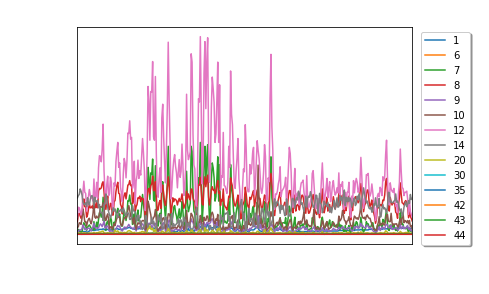

None
Ingrese un numero entre 1-12 para ver el respectivo ejercicio, info o salir para terminar: salir
Adios.


In [20]:
def main():
  # Funcion que maneja los ingresos del usuario y  muestra los respectivos ejercicios resueltos, a  su ves como la informaciond el trabajo.
  print('Bienvenido al Trabajo Integrador de Python del Grupo 2.')
  programa = True
  while programa != False:
    programa = manejo_input_usuario()

main()